### Importing necessary library and loading the dataset

In [275]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Loan_Prediction_Dataset
df = pd.read_csv('Loan_Prediction_Dataset.csv')
# Displaying the head of the dataset
df.head()


,Id,Gross_Income,Expenses,Net_Income,Age,Gender,Experience,Marital_Status,House_Ownership,Car_Ownership,Profession,City,State,Current_Job_Yrs,Current_House_Yrs,Nos_Family_Members,Credit_Type,Credit_Score,Co-Applicant_Credit_Type,Risk_Flag
0,1.0,1303834.0,391173.0,912661.0,23.0,M,3.0,single,rented,no,Software_Developer,Hindupur,Andhra_Pradesh,3.0,13.0,1,EXP,758.0,CIB,0
1,2.0,7574516.0,2272395.0,5302121.0,40.0,F,10.0,single,rented,no,Chartered_Accountant,Khandwa,Madhya_Pradesh,9.0,13.0,3,EQUI,552.0,EXP,1
2,3.0,3991815.0,1197611.0,2794204.0,66.0,M,4.0,married,rented,no,Secretary,Bidhannagar,West_Bengal,4.0,10.0,4,EXP,834.0,CIB,0
3,4.0,6256451.0,1876976.0,4379475.0,41.0,F,2.0,married,rented,yes,Technician,Bellary,Karnataka,2.0,12.0,1,EXP,587.0,CIB,1
4,5.0,5768871.0,1730708.0,4038163.0,47.0,M,11.0,single,rented,no,Secretary,Danapur,Bihar,3.0,14.0,2,CRIF,602.0,EXP,1


In [276]:
# Checking for missing values
df.isnull().sum()

Id                          6
Gross_Income                6
Expenses                    6
Net_Income                  3
Age                         5
Gender                      2
Experience                  3
Marital_Status              3
House_Ownership             2
Car_Ownership               2
Profession                  5
City                        0
State                       1
Current_Job_Yrs             4
Current_House_Yrs           5
Nos_Family_Members          0
Credit_Type                 2
Credit_Score                3
Co-Applicant_Credit_Type    1
Risk_Flag                   0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55778 entries, 0 to 55777
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        55772 non-null  float64
 1   Gross_Income              55772 non-null  float64
 2   Expenses                  55772 non-null  float64
 3   Net_Income                55775 non-null  float64
 4   Age                       55773 non-null  float64
 5   Gender                    55776 non-null  object 
 6   Experience                55775 non-null  float64
 7   Marital_Status            55775 non-null  object 
 8   House_Ownership           55776 non-null  object 
 9   Car_Ownership             55776 non-null  object 
 10  Profession                55773 non-null  object 
 11  City                      55778 non-null  object 
 12  State                     55777 non-null  object 
 13  Current_Job_Yrs           55774 non-null  float64
 14  Curren

<Axes: >

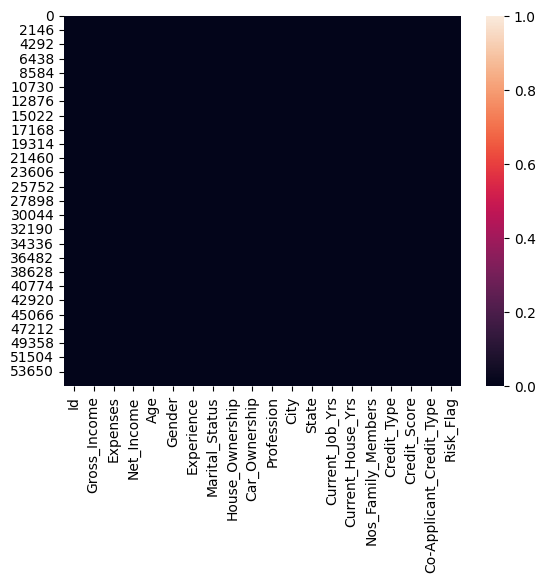

In [277]:
## statistical info on numeric features 
df.describe()

## datatype info on all features
df.info()

sns.heatmap(df.isnull())

In [278]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(include='object').columns

# Fill missing values with mean for numerical columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Fill missing values with mode for categorical columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


In [279]:
# Checking for missing values
df.isnull().sum()

Id                          0
Gross_Income                0
Expenses                    0
Net_Income                  0
Age                         0
Gender                      0
Experience                  0
Marital_Status              0
House_Ownership             0
Car_Ownership               0
Profession                  0
City                        0
State                       0
Current_Job_Yrs             0
Current_House_Yrs           0
Nos_Family_Members          0
Credit_Type                 0
Credit_Score                0
Co-Applicant_Credit_Type    0
Risk_Flag                   0
dtype: int64

In [280]:
# Checking for duplicate values
df.duplicated().sum()

0

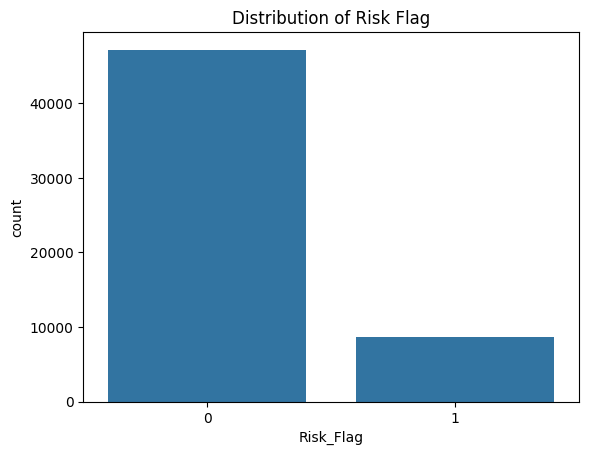

In [281]:
# Visualize distribution of the target variable ('Risk_Flag')
sns.countplot(x='Risk_Flag', data=df)
plt.title('Distribution of Risk Flag')
plt.show()

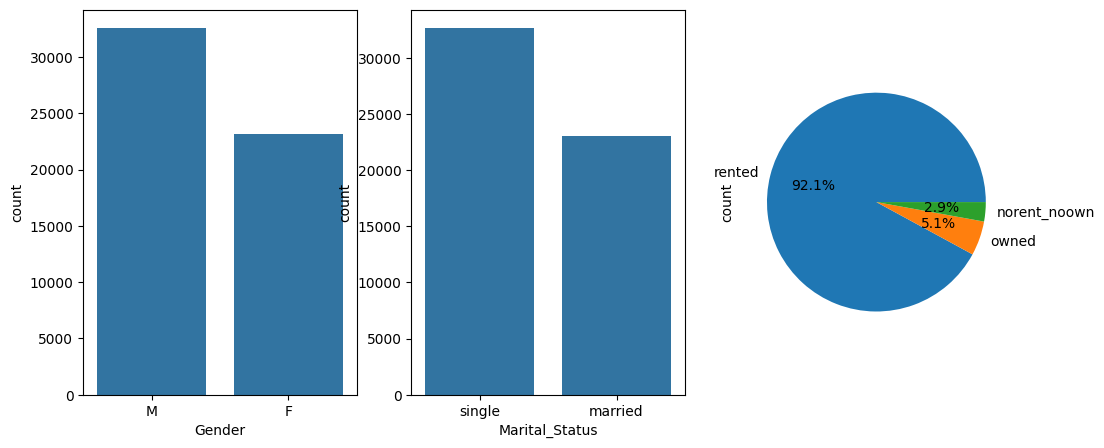

In [282]:
# Univariate Categorical Features
plt.figure(figsize=(12, 5))

# Countplot for 'Gender'
plt.subplot(1, 3, 1)
sns.countplot(data=df, x="Gender")
# Countplot for 'Marital_Status'
plt.subplot(1, 3, 2)
sns.countplot(data=df, x="Marital_Status")

# Pie chart for 'House_Ownership'
plt.subplot(1, 3, 3)
df['House_Ownership'].value_counts().plot(kind='pie', autopct='%0.1f%%')

plt.show()



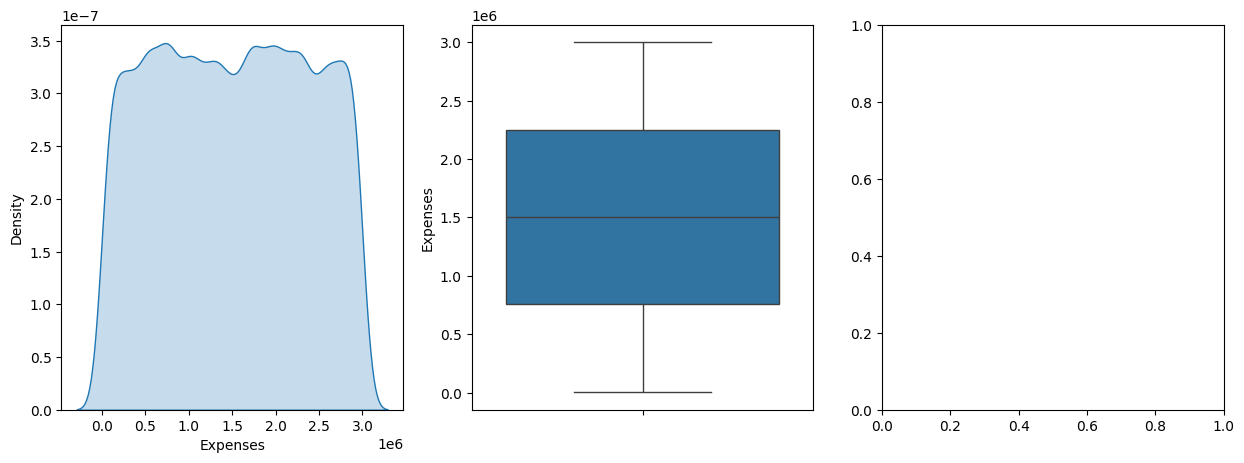

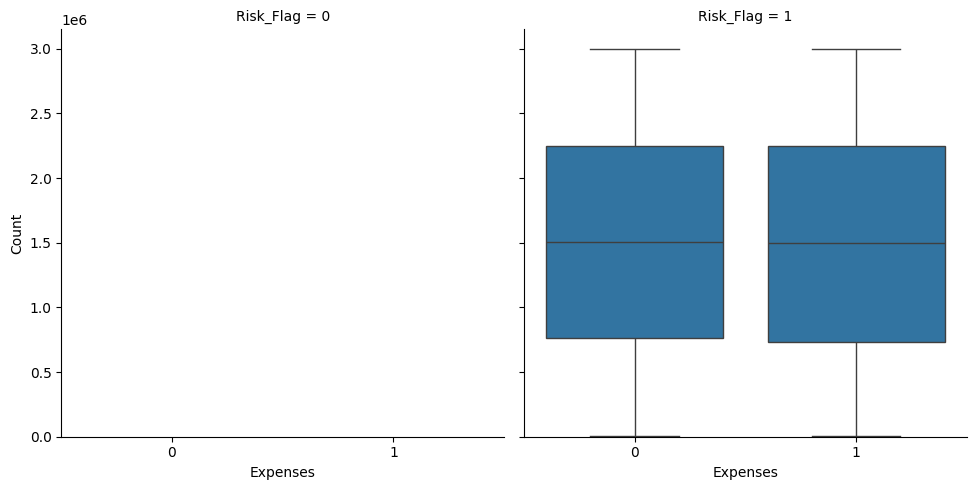

In [283]:
# Univariate Numerical Features - Expenses
plt.figure(figsize=(15, 5))

# KDE Plot for 'Expenses'
plt.subplot(1, 3, 1)
sns.kdeplot(df['Expenses'], fill=True)

# Boxplot for 'Expenses'
plt.subplot(1, 3, 2)
sns.boxplot(data=df, y='Expenses')
# Distribution and Boxplot for 'Expenses' based on 'Risk_Flag'
plt.subplot(1, 3, 3)
sns.displot(df, x='Expenses', col='Risk_Flag', kde=True)
sns.boxplot(x='Risk_Flag', y='Expenses', data=df)

plt.show()

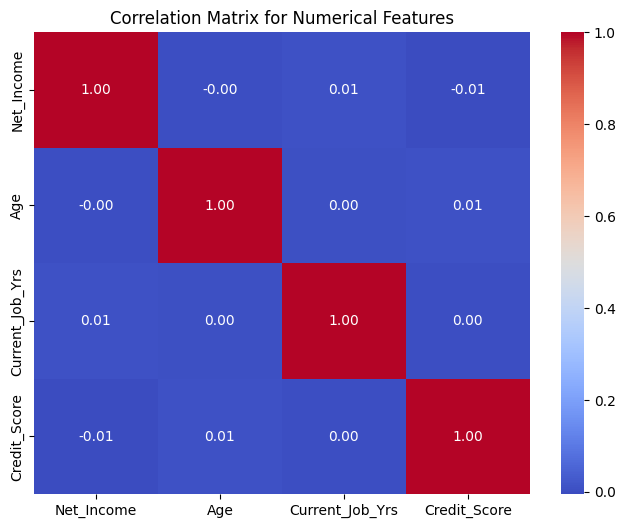

In [284]:
# Correlation Matrix for Numerical Features
# Correlation Matrix
numerical_features = ['Net_Income', 'Age', 'Current_Job_Yrs', 'Credit_Score']
corr = df[numerical_features].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Features')
plt.show()

Text(0.5, 1.0, 'Age vs Profession')

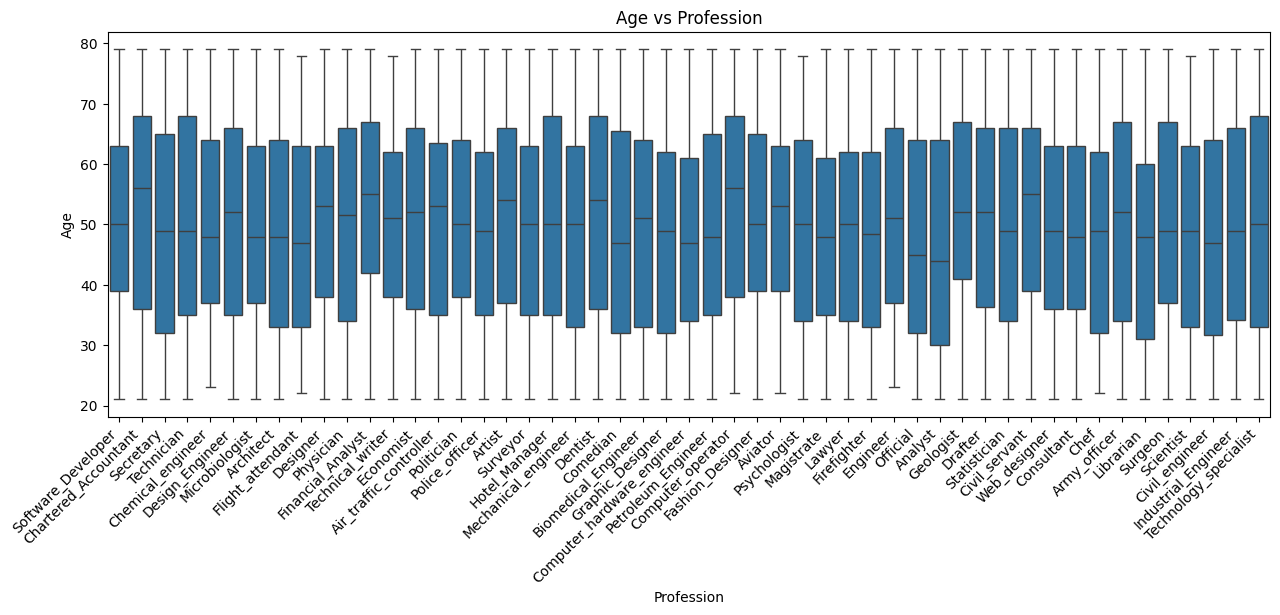

In [285]:
# Numerical vs Categorical - Boxplots

# Boxplots
# plt.figure(figsize=(15, 5))

# Age vs Profession
plt.figure(figsize=(15, 5))
sns.boxplot(x='Profession', y='Age', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Age vs Profession')




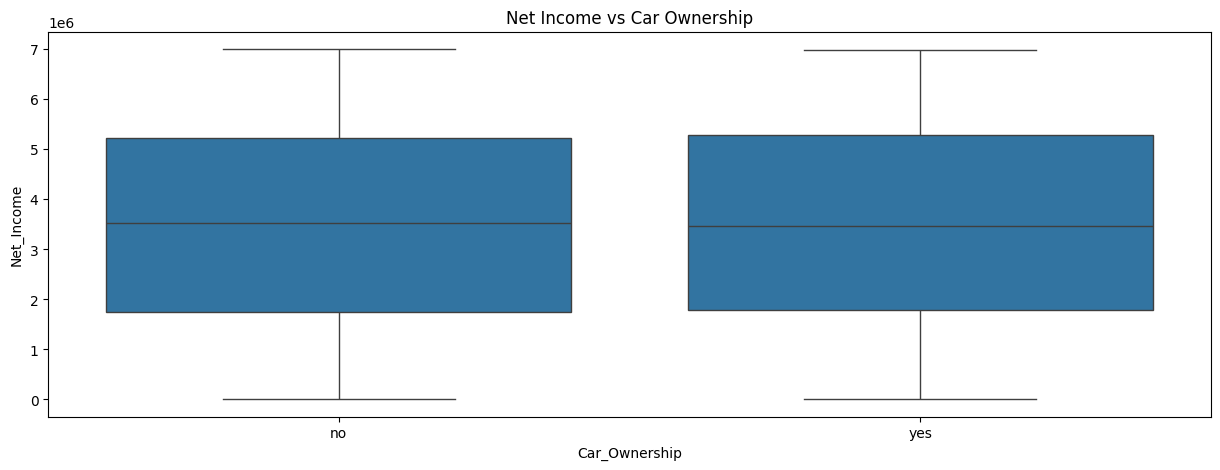

In [286]:
# Net Income vs Car Ownership
plt.figure(figsize=(15, 5))
sns.boxplot(x='Car_Ownership', y='Net_Income', data=df)
plt.title('Net Income vs Car Ownership')

plt.show()

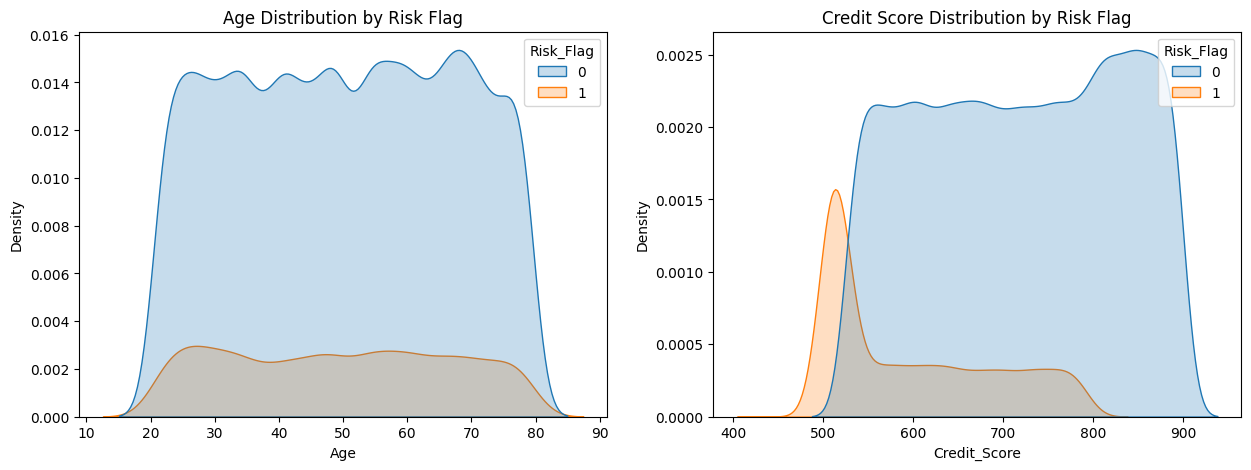

In [287]:
# KDE Plots for Numerical Features by Target Variable
# KDE Plots
plt.figure(figsize=(15, 5))

# Age by Risk Flag
plt.subplot(1, 2, 1)
sns.kdeplot(x='Age', hue='Risk_Flag', data=df, fill=True)
plt.title('Age Distribution by Risk Flag')

# Credit Score by Risk Flag
plt.subplot(1, 2, 2)
sns.kdeplot(x='Credit_Score', hue='Risk_Flag', data=df, fill=True)
plt.title('Credit Score Distribution by Risk Flag')

plt.show()

<Figure size 800x600 with 0 Axes>

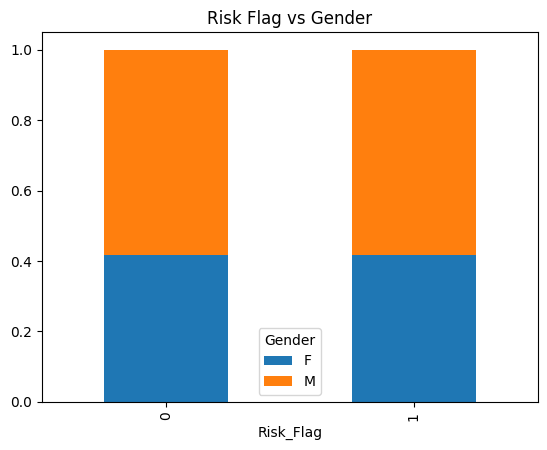

In [288]:
# Categorical vs Categorical - Stacked Bar Plot
# Stacked Bar Plot
plt.figure(figsize=(8, 6))

# Cross-tabulation and Percentage Stacked Bar Plot
cross_tab = pd.crosstab(df['Risk_Flag'], df['Gender'], normalize='index')
cross_tab.plot(kind='bar', stacked=True)
plt.title('Risk Flag vs Gender')
plt.show()

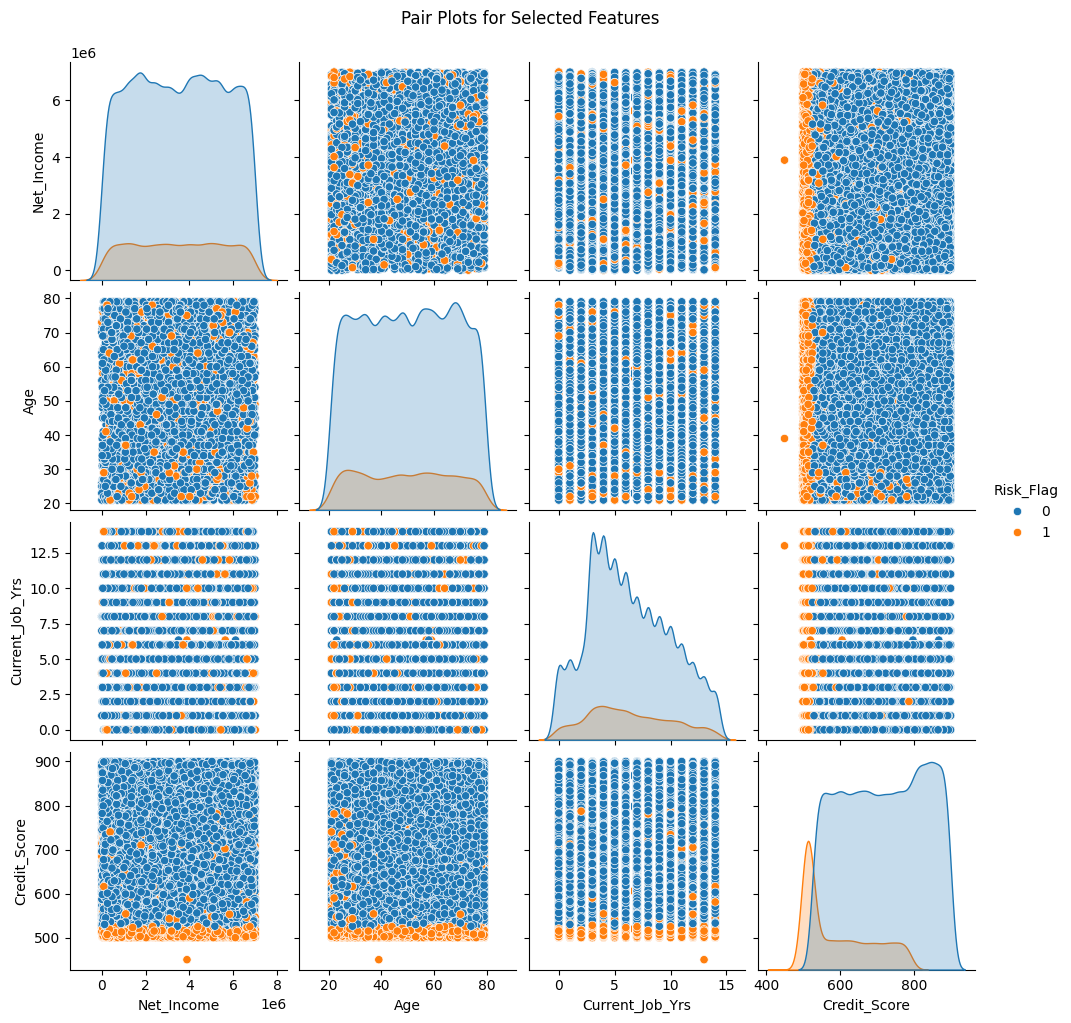

In [289]:
# Additional Bivariate Analysis - Pair Plots
# Pair Plots
selected_features = ['Net_Income', 'Age', 'Current_Job_Yrs', 'Credit_Score', 'Risk_Flag']
sns.pairplot(df[selected_features], hue='Risk_Flag')
plt.suptitle('Pair Plots for Selected Features', y=1.02)
plt.show()

In [290]:
df.head()

,Id,Gross_Income,Expenses,Net_Income,Age,Gender,Experience,Marital_Status,House_Ownership,Car_Ownership,Profession,City,State,Current_Job_Yrs,Current_House_Yrs,Nos_Family_Members,Credit_Type,Credit_Score,Co-Applicant_Credit_Type,Risk_Flag
0,1.0,1303834.0,391173.0,912661.0,23.0,M,3.0,single,rented,no,Software_Developer,Hindupur,Andhra_Pradesh,3.0,13.0,1,EXP,758.0,CIB,0
1,2.0,7574516.0,2272395.0,5302121.0,40.0,F,10.0,single,rented,no,Chartered_Accountant,Khandwa,Madhya_Pradesh,9.0,13.0,3,EQUI,552.0,EXP,1
2,3.0,3991815.0,1197611.0,2794204.0,66.0,M,4.0,married,rented,no,Secretary,Bidhannagar,West_Bengal,4.0,10.0,4,EXP,834.0,CIB,0
3,4.0,6256451.0,1876976.0,4379475.0,41.0,F,2.0,married,rented,yes,Technician,Bellary,Karnataka,2.0,12.0,1,EXP,587.0,CIB,1
4,5.0,5768871.0,1730708.0,4038163.0,47.0,M,11.0,single,rented,no,Secretary,Danapur,Bihar,3.0,14.0,2,CRIF,602.0,EXP,1


In [291]:
# feraure engineering
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# One-hot encoding for categorical columns with multiple categories (e.g., 'Profession', 'City', 'State', 'Credit_Type', 'Co-Applicant_Credit_Type')
df = pd.get_dummies(df, columns=['Profession', 'City', 'State', 'Credit_Type', 'Co-Applicant_Credit_Type'], prefix=['Profession', 'City', 'State', 'Credit_Type', 'CoApplicant'])

# Label encoding for binary categorical columns (e.g., 'Gender', 'Marital_Status', 'House_Ownership', 'Car_Ownership')
label_encoder = LabelEncoder()
binary_columns = ['Gender', 'Marital_Status', 'House_Ownership', 'Car_Ownership']
for col in binary_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Label encoding for other categorical columns (if applicable)
# For example, if 'Credit_Score' has categories like 'Excellent', 'Good', 'Average', 'Poor'
# label encode them to numerical values
df['Credit_Score'] = label_encoder.fit_transform(df['Credit_Score'])

# Display the modified DataFrame
df.head()



,Id,Gross_Income,Expenses,Net_Income,Age,Gender,Experience,Marital_Status,House_Ownership,Car_Ownership,Current_Job_Yrs,Current_House_Yrs,Nos_Family_Members,Credit_Score,Risk_Flag,Profession_Air_traffic_controller,Profession_Analyst,Profession_Architect,Profession_Army_officer,Profession_Artist,Profession_Aviator,Profession_Biomedical_Engineer,Profession_Chartered_Accountant,Profession_Chef,Profession_Chemical_engineer,Profession_Civil_engineer,Profession_Civil_servant,Profession_Comedian,Profession_Computer_hardware_engineer,Profession_Computer_operator,Profession_Consultant,Profession_Dentist,Profession_Design_Engineer,Profession_Designer,Profession_Drafter,Profession_Economist,Profession_Engineer,Profession_Fashion_Designer,Profession_Financial_Analyst,Profession_Firefighter,Profession_Flight_attendant,Profession_Geologist,Profession_Graphic_Designer,Profession_Hotel_Manager,Profession_Industrial_Engineer,Profession_Lawyer,Profession_Librarian,Profession_Magistrate,Profession_Mechanical_engineer,Profession_Microbiologist,Profession_Official,Profession_Petroleum_Engineer,Profession_Physician,Profession_Police_officer,Profession_Politician,Profession_Psychologist,Profession_Scientist,Profession_Secretary,Profession_Software_Developer,Profession_Statistician,Profession_Surgeon,Profession_Surveyor,Profession_Technical_writer,Profession_Technician,Profession_Technology_specialist,Profession_Web_designer,City_Adoni,City_Agartala,City_Agra,City_Ahmedabad,City_Ahmednagar,City_Aizawl,City_Ajmer,City_Akola,City_Alappuzha,City_Aligarh,City_Allahabad,City_Alwar,City_Amaravati,City_Ambala,City_Ambarnath,City_Ambattur,City_Amravati,City_Amritsar,City_Amroha,City_Anand,City_Anantapur,City_Anantapuram[24],City_Arrah,City_Asansol,City_Aurangabad,City_Aurangabad[39],City_Avadi,City_Bahraich,City_Ballia,City_Bally,City_Bangalore,City_Baranagar,City_Barasat,City_Bardhaman,City_Bareilly,City_Bathinda,City_Begusarai,City_Belgaum,City_Bellary,City_Berhampore,City_Berhampur,City_Bettiah[33],City_Bhagalpur,City_Bhalswa_Jahangir_Pur,City_Bharatpur,City_Bhatpara,City_Bhavnagar,City_Bhilai,City_Bhilwara,City_Bhimavaram,City_Bhind,City_Bhiwandi,City_Bhiwani,City_Bhopal,City_Bhubaneswar,City_Bhusawal,City_Bidar,City_Bidhannagar,City_Bihar_Sharif,City_Bijapur,City_Bikaner,City_Bilaspur,City_Bokaro,City_Bongaigaon,City_Bulandshahr,City_Burhanpur,City_Buxar[37],City_Chandigarh_city,City_Chandrapur,City_Chapra,City_Chennai,City_Chinsurah,City_Chittoor[28],City_Coimbatore,City_Cuttack,City_Danapur,City_Darbhanga,City_Davanagere,City_Dehradun,City_Dehri[30],City_Delhi_city,City_Deoghar,City_Dewas,City_Dhanbad,City_Dharmavaram,City_Dhule,City_Dibrugarh,City_Dindigul,City_Durg,City_Durgapur,City_Eluru[25],City_Erode[17],City_Etawah,City_Faridabad,City_Farrukhabad,City_Fatehpur,City_Firozabad,City_Gandhidham,City_Gandhinagar,City_Gangtok,City_Gaya,City_Ghaziabad,City_Giridih,City_Gopalpur,City_Gorakhpur,City_Gudivada,City_Gulbarga,City_Guna,City_Guntakal,City_Guntur[13],City_Gurgaon,City_Guwahati,City_Gwalior,City_Hajipur[31],City_Haldia,City_Hapur,City_Haridwar,City_Hazaribagh,City_Hindupur,City_Hospet,City_Hosur,City_Howrah,City_Hubliâ€“Dharwad,City_Hyderabad,City_Ichalkaranji,City_Imphal,City_Indore,City_Jabalpur,City_Jaipur,City_Jalandhar,City_Jalgaon,City_Jalna,City_Jamalpur[36],City_Jammu[16],City_Jamnagar,City_Jamshedpur,City_Jaunpur,City_Jehanabad[38],City_Jhansi,City_Jodhpur,City_Jorhat,City_Junagadh,City_Kadapa[23],City_Kakinada,City_Kalyan-Dombivli,City_Kamarhati,City_Kanpur,City_Karaikudi,City_Karawal_Nagar,City_Karimnagar,City_Karnal,City_Katihar,City_Katni,City_Kavali,City_Khammam,City_Khandwa,City_Kharagpur,"City_Khora,_Ghaziabad",City_Kirari_Suleman_Nagar,City_Kishanganj[35],City_Kochi,City_Kolhapur,City_Kolkata,City_Kollam,City_Korba,City_Kota[6],City_Kottayam,City_Kozhikode,City_Kulti,City_Kumbakonam,City_Kurnool[18],City_Latur,City_Loni,City_Lucknow,City_Ludhiana,City_Machilipatnam,City_Madanapalle,City_Madhyamgram,City_Madurai,City_Mahbubnaga

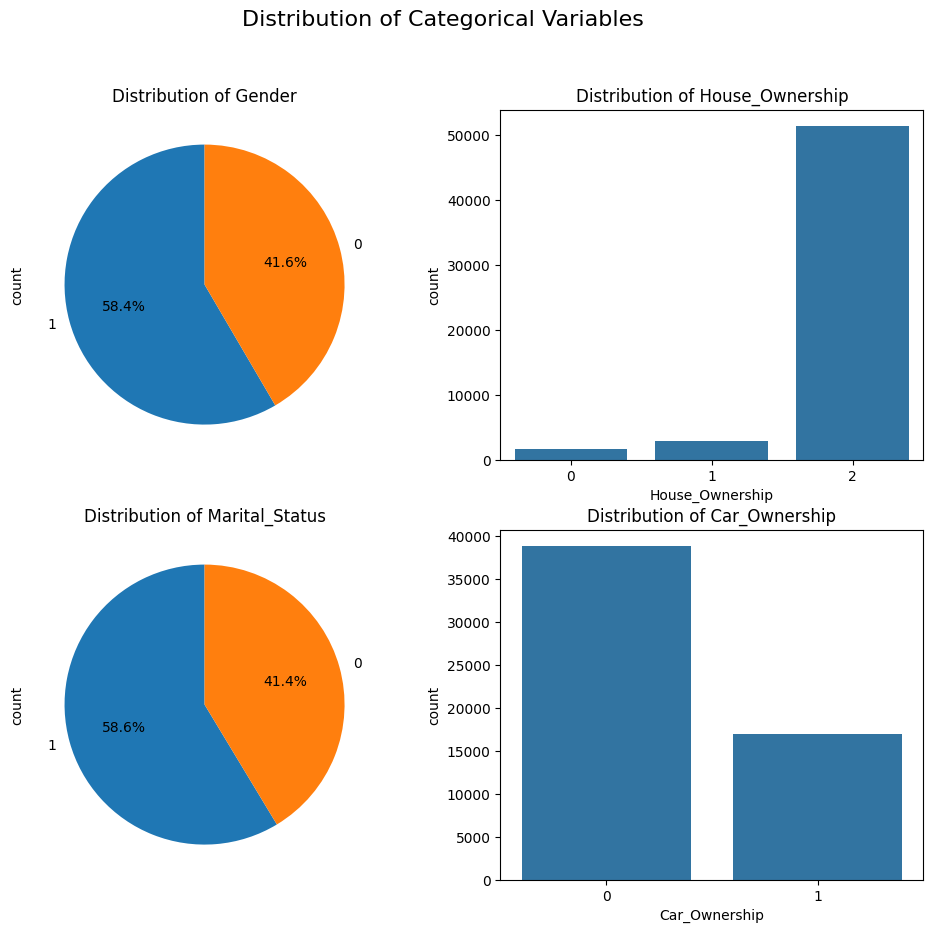

In [292]:
import matplotlib.pyplot as plt
import seaborn as sns


# Select categorical columns for visualization
categorical_columns = ['Gender', 'Marital_Status', 'House_Ownership', 'Car_Ownership']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Distribution of Categorical Variables', fontsize=16)

# Plot pie charts for variables with a small number of categories
for i, col in enumerate(categorical_columns[:2]):
    df[col].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[i, 0], startangle=90)
    axes[i, 0].set(title=f'Distribution of {col}')

# Plot bar plots for variables with a larger number of categories
for i, col in enumerate(categorical_columns[2:]):
    sns.countplot(x=col, data=df, ax=axes[i, 1])
    axes[i, 1].set(title=f'Distribution of {col}')

plt.show()


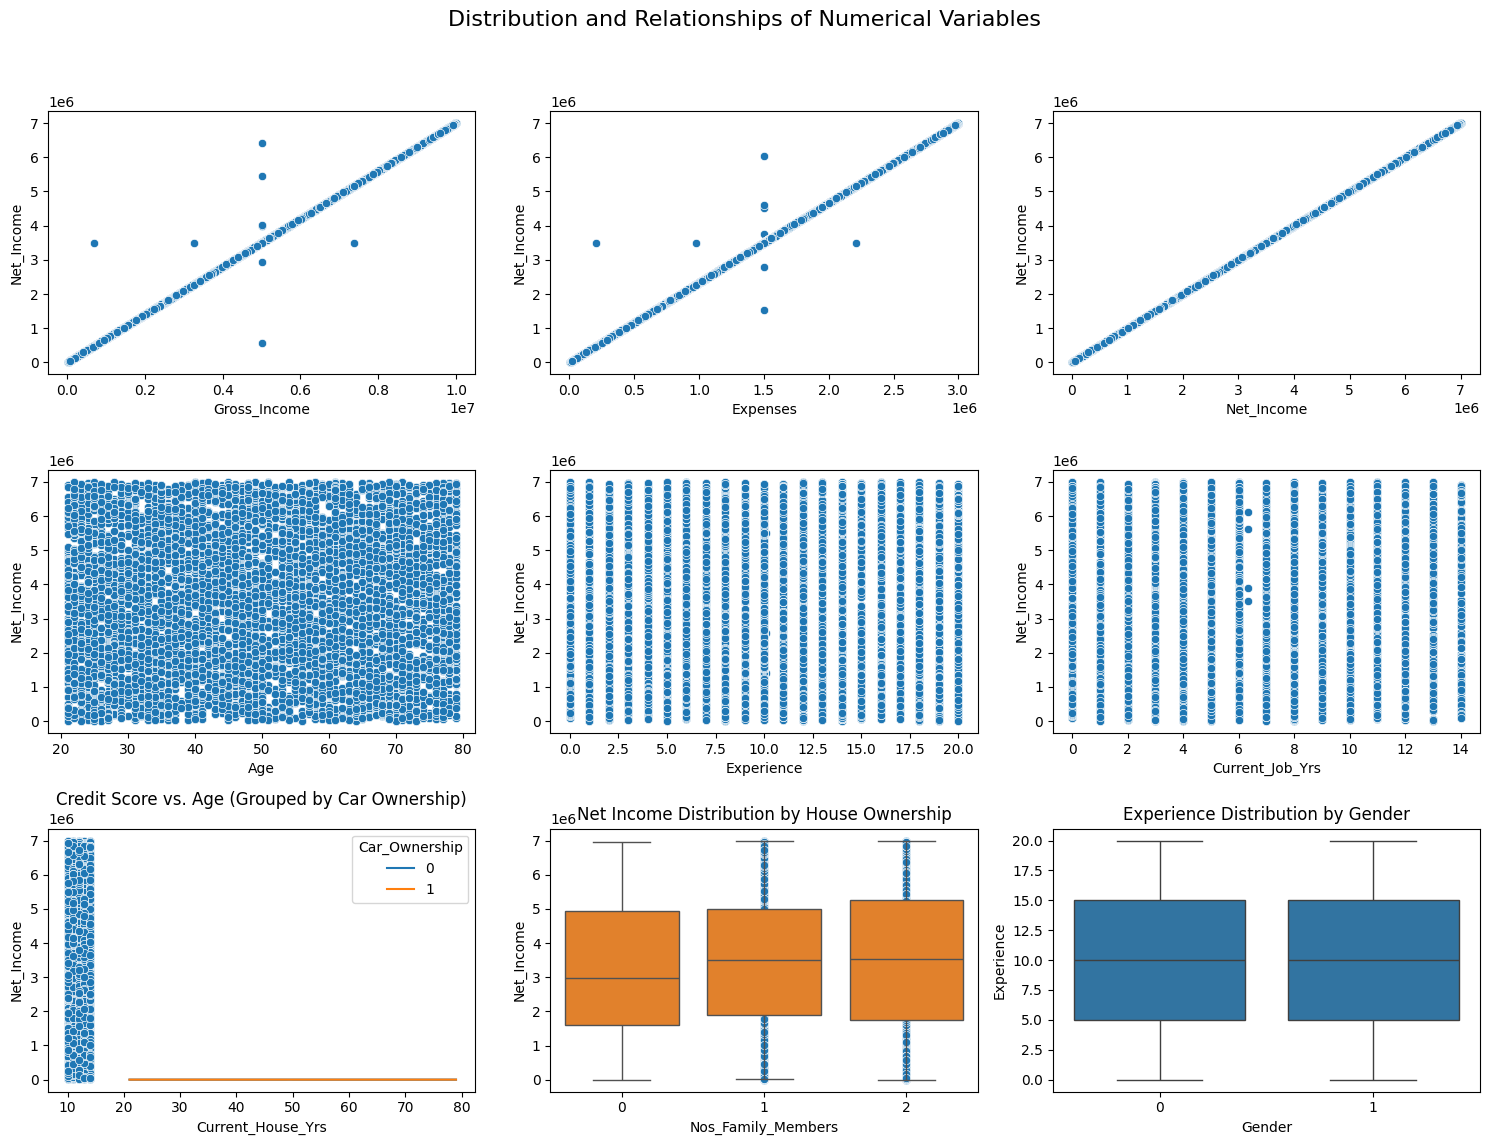

In [293]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for visualization
numerical_columns = ['Gross_Income', 'Expenses', 'Net_Income', 'Age', 'Experience', 'Current_Job_Yrs', 'Current_House_Yrs', 'Nos_Family_Members', 'Credit_Score']

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle('Distribution and Relationships of Numerical Variables', fontsize=16)

# Scatter plots for numerical variables against 'Net_Income'
for i, col in enumerate(numerical_columns[:-1]):
    sns.scatterplot(x=col, y='Net_Income', data=df, ax=axes[i // 3, i % 3])

# Line plot for 'Credit_Score' over 'Age' with grouping by 'Car_Ownership'
sns.lineplot(x='Age', y='Credit_Score', hue='Car_Ownership', data=df, ax=axes[2, 0])
axes[2, 0].set(title='Credit Score vs. Age (Grouped by Car Ownership)')

# Box plot for 'Net_Income' grouped by 'House_Ownership'
sns.boxplot(x='House_Ownership', y='Net_Income', data=df, ax=axes[2, 1])
axes[2, 1].set(title='Net Income Distribution by House Ownership')

# Box plot for 'Experience' grouped by 'Gender'
sns.boxplot(x='Gender', y='Experience', data=df, ax=axes[2, 2])
axes[2, 2].set(title='Experience Distribution by Gender')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


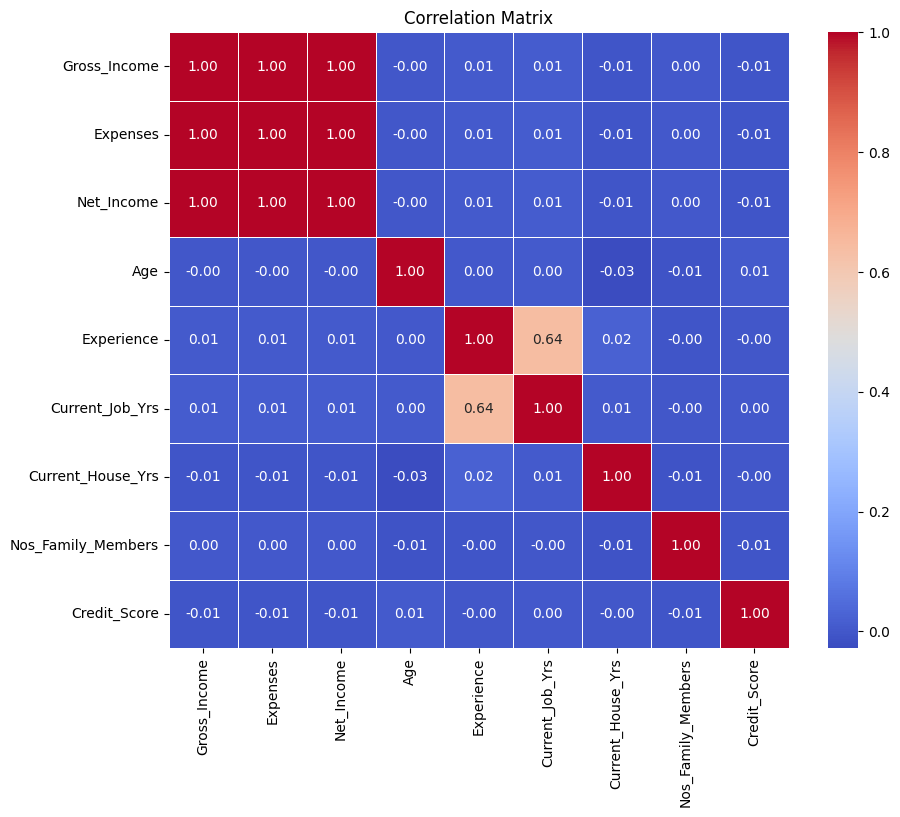

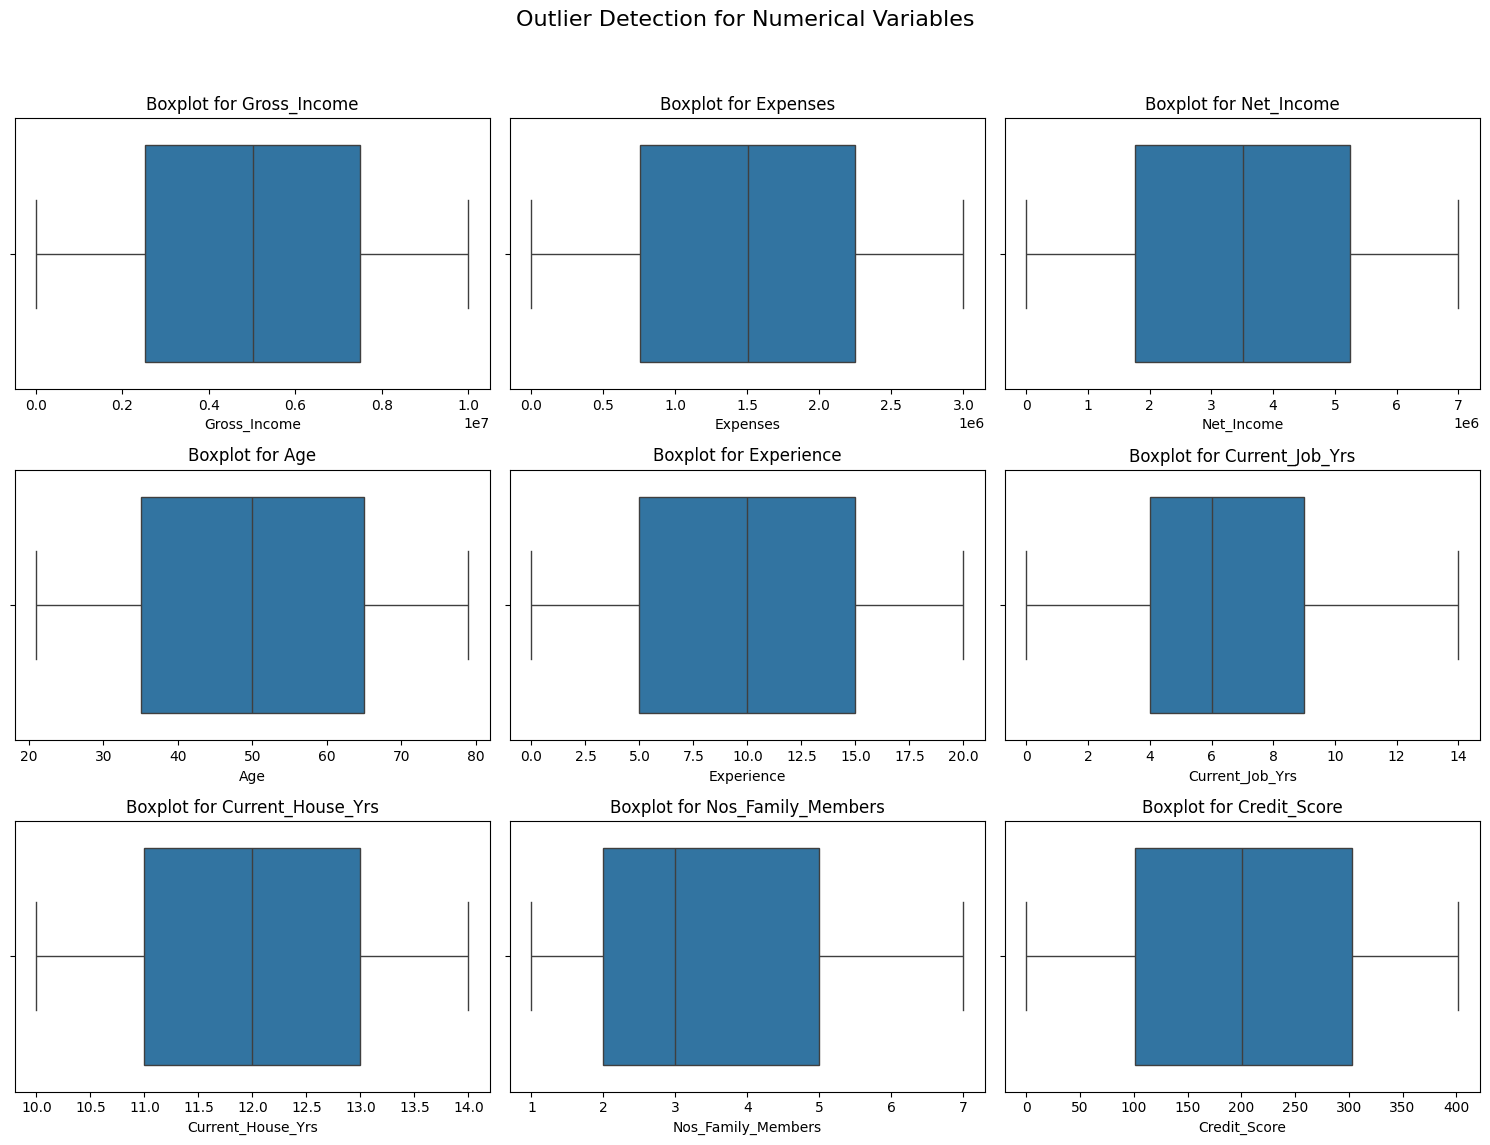

In [294]:
import matplotlib.pyplot as plt
import seaborn as sns


# Select numerical columns for correlation analysis
numerical_columns = ['Gross_Income', 'Expenses', 'Net_Income', 'Age', 'Experience', 'Current_Job_Yrs', 'Current_House_Yrs', 'Nos_Family_Members', 'Credit_Score']

# Correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Outlier detection using box plots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle('Outlier Detection for Numerical Variables', fontsize=16)

for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df[col], ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set(title=f'Boxplot for {col}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [295]:
df.columns

Index(['Id', 'Gross_Income', 'Expenses', 'Net_Income', 'Age', 'Gender',
       'Experience', 'Marital_Status', 'House_Ownership', 'Car_Ownership',
       ...
       'State_Uttar_Pradesh', 'State_Uttar_Pradesh[5]', 'State_Uttarakhand',
       'State_West_Bengal', 'Credit_Type_CIB', 'Credit_Type_CRIF',
       'Credit_Type_EQUI', 'Credit_Type_EXP', 'CoApplicant_CIB',
       'CoApplicant_EXP'],
      dtype='object', length=418)

In [299]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# splitting the data into features and target variable
X = df.drop('Risk_Flag', axis=1)
y = df['Risk_Flag']

# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# creating an instance of Logistic Regression model with increased iteration
model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8442093940480458


In [301]:
from sklearn.metrics import mean_squared_error

# spliting the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# spliting the training data into training and validation sets (60% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

#   creating an instance of Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.11407750348097184


In [302]:
from sklearn.ensemble import RandomForestClassifier


#   creating an instance of Random Forest Classifier
model = RandomForestClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9257798494083901


In [303]:
from sklearn.tree import DecisionTreeClassifier


#   creating an instance of Decision Tree Classifier
model = DecisionTreeClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8871459304410183


In [304]:
from sklearn.ensemble import ExtraTreesClassifier


#   creating an instance of Extra Trees Classifier
model = ExtraTreesClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9048942273216206


In [305]:
df.columns

Index(['Id', 'Gross_Income', 'Expenses', 'Net_Income', 'Age', 'Gender',
       'Experience', 'Marital_Status', 'House_Ownership', 'Car_Ownership',
       ...
       'State_Uttar_Pradesh', 'State_Uttar_Pradesh[5]', 'State_Uttarakhand',
       'State_West_Bengal', 'Credit_Type_CIB', 'Credit_Type_CRIF',
       'Credit_Type_EQUI', 'Credit_Type_EXP', 'CoApplicant_CIB',
       'CoApplicant_EXP'],
      dtype='object', length=418)

In [306]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Logistic Regression model with increased max_iter
model = LogisticRegression(max_iter=1000)

# Function to classify and print accuracy
def classify(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    print("Accuracy is", model.score(X_test, y_test) * 100)
    # Cross-validation
    score = cross_val_score(model, X_scaled, y, cv=5)
    print("Cross-validation accuracy is", np.mean(score) * 100)

# Call the function with scaled features
classify(model, X_train, X_test, y_train, y_test)

Accuracy is 84.30441018286125
Cross-validation accuracy is 86.29208588070667


In [307]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[9299,   60],
       [ 766, 1031]], dtype=int64)

<Axes: >

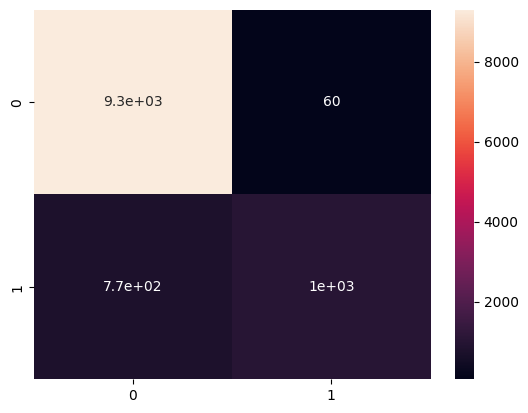

In [308]:
sns.heatmap(cm, annot=True)